In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
#-------------------------------
from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score, classification_report, confusion_matrix
#---------------------------------------------------
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

### Data collection and Analysis

In [2]:
diabetes_dataset = pd.read_csv("d:\Data\diabetes.csv")
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diabetes_dataset.shape

(768, 9)

In [4]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
print(diabetes_dataset['Outcome'].value_counts())
print()
print("0 ---> Non-Diabetes")
print("1 ---> Diabetes")


Outcome
0    500
1    268
Name: count, dtype: int64

0 ---> Non-Diabetes
1 ---> Diabetes


In [6]:
diabetes_dataset.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [7]:
X = diabetes_dataset.drop(columns=['Outcome'])
Y = diabetes_dataset['Outcome']

In [8]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [9]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [10]:
diabetes_dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [12]:
print(x_train.shape,x_test.shape)

(614, 8) (154, 8)


###                                   SVM model

In [13]:
model_svm = svm.SVC(kernel='linear')
model_svm.fit(x_train,y_train)

SVC(kernel='linear')

In [14]:
y_train_predict = model_svm.predict(x_train)
y_test_predict = model_svm.predict(x_test)

In [15]:
training_data_accuracy = accuracy_score(y_train,y_train_predict)
formatted_accuracy = "{:.2%}".format(training_data_accuracy)
print(f'Accuracy score of the training data: {formatted_accuracy}')

Accuracy score of the training data: 78.34%


In [16]:
testing_data_accuracy = accuracy_score(y_test,y_test_predict)
formatted_accuracy = "{:.2%}".format(testing_data_accuracy)
print(f'Accuracy score of the testing data: {formatted_accuracy}')

Accuracy score of the testing data: 77.27%


[[91  9]
 [26 28]]


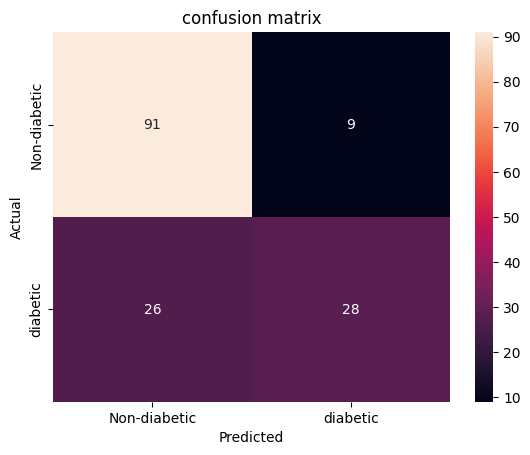

In [17]:
# confusion Matrix
matrix_svm = confusion_matrix(y_test,y_test_predict)
sns.heatmap(matrix_svm,annot=True,fmt="g",xticklabels=['Non-diabetic','diabetic'],yticklabels=['Non-diabetic','diabetic'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('confusion matrix')
print(matrix_svm)

classification report

In [18]:
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       100
           1       0.76      0.52      0.62        54

    accuracy                           0.77       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.77      0.77      0.76       154



Making predictive system

In [19]:
input_data = (5,166,72,19,175,25.8,0.587,51)
#changing the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

In [20]:
# reshape array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
input_data_reshaped

array([[  5.   , 166.   ,  72.   ,  19.   , 175.   ,  25.8  ,   0.587,
         51.   ]])

In [21]:
prediction = model_svm.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


Gradient Boosting

In [22]:
model_grad = GradientBoostingClassifier()
model_grad.fit(x_train,y_train)

GradientBoostingClassifier()

In [23]:
y_train_predict = model_grad.predict(x_train)
y_test_predict = model_grad.predict(x_test)
training_data_accuracy = accuracy_score(y_train,y_train_predict)
formatted_accuracy = "{:.2%}".format(training_data_accuracy)
print(f'Accuracy score of the training data: {formatted_accuracy}')

Accuracy score of the training data: 92.51%


In [24]:
y_test_predict = model_grad.predict(x_test)
testing_data_accuracy = accuracy_score(y_test,y_test_predict)
formatted_accuracy = "{:.2%}".format(testing_data_accuracy)
print(f'Accuracy score of the testing data: {formatted_accuracy}')

Accuracy score of the testing data: 70.13%


confusion matrix for GradientBoosting Algorithm

In [25]:
cm = confusion_matrix(y_test,y_test_predict)
print(cm)

[[84 16]
 [30 24]]


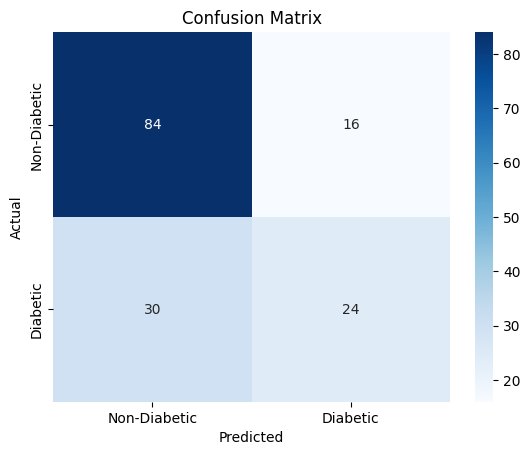

In [26]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Non-Diabetic', 'Diabetic'], 
            yticklabels=['Non-Diabetic', 'Diabetic'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

classification report

In [27]:
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.74      0.84      0.79       100
           1       0.60      0.44      0.51        54

    accuracy                           0.70       154
   macro avg       0.67      0.64      0.65       154
weighted avg       0.69      0.70      0.69       154



In [28]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model_grad.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


# Logistic Regression

In [29]:
model_log = LogisticRegression()
model_log.fit(x_train,y_train)

LogisticRegression()

In [30]:
test_predict = model_log.predict(x_test)
train_predict = model_log.predict(x_train)
testing_data_accuracy = accuracy_score(y_test,test_predict)
training_data_accuracy = accuracy_score(y_train,train_predict)
print("Accuracy score of the testing data:","{:.2%}".format(testing_data_accuracy))
print("Accuracy score of the training data:","{:.2%}".format(training_data_accuracy))

Accuracy score of the testing data: 75.32%
Accuracy score of the training data: 78.50%


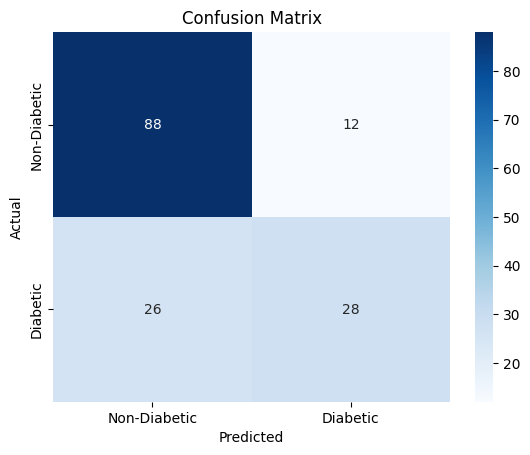

In [31]:
cm = confusion_matrix(y_test,test_predict)
sns.heatmap(cm, annot=True, fmt="g", cmap="Blues", 
            xticklabels=['Non-Diabetic', 'Diabetic'], 
            yticklabels=['Non-Diabetic', 'Diabetic'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

classification report

In [32]:
print(classification_report(y_test,test_predict))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       100
           1       0.70      0.52      0.60        54

    accuracy                           0.75       154
   macro avg       0.74      0.70      0.71       154
weighted avg       0.75      0.75      0.74       154



In [33]:
input_data = (5,166,72,19,175,25.8,0.587,51)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model_log.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')


[1]
The person is diabetic


## Save model

In [34]:
import pickle

In [35]:
# filename = 'diabetes_model.sav'
pickle.dump(model_svm,open('diabetes_model.sav','wb'))

In [36]:
# # loading the saved model
loaded_model = pickle.load(open('diabetes_model.sav','rb'))

In [37]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


In [38]:
for column in X.columns:
  print(column)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
